# **WEEK 1 Analysis**

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
assets = ['AAPL' , 'MSFT' , 'GOOG' , 'AMZN' , 'TSLA']

In [4]:
long_data = yf.download(assets, start="2015-01-01", end="2024-01-01",auto_adjust=False)
med_data = yf.download(assets, start="2020-01-01", end="2024-01-01",auto_adjust=False)
long_data.to_csv("/home/maulik/Desktop/yfinance_long.csv" , index=False)
med_data.to_csv("/home/maulik/Desktop/yfinance_med.csv" , index=False)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [5]:
rows_with_nan = long_data[long_data.isna().any(axis=1)]
rows_with_nan
# this shows there is no row with even a single box empty


Empty DataFrame
Columns: [(Adj Close, AAPL), (Adj Close, AMZN), (Adj Close, GOOG), (Adj Close, MSFT), (Adj Close, TSLA), (Close, AAPL), (Close, AMZN), (Close, GOOG), (Close, MSFT), (Close, TSLA), (High, AAPL), (High, AMZN), (High, GOOG), (High, MSFT), (High, TSLA), (Low, AAPL), (Low, AMZN), (Low, GOOG), (Low, MSFT), (Low, TSLA), (Open, AAPL), (Open, AMZN), (Open, GOOG), (Open, MSFT), (Open, TSLA), (Volume, AAPL), (Volume, AMZN), (Volume, GOOG), (Volume, MSFT), (Volume, TSLA)]
Index: []

[0 rows x 30 columns]

In [6]:
adj_close = long_data['Adj Close']
long_data.describe()


Price     Adj Close                                                      \
Ticker         AAPL         AMZN         GOOG         MSFT         TSLA   
count   2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean      81.394710    91.950540    73.063479   154.516907   102.886245   
std       55.990879    48.654536    36.298158    99.658478   110.936400   
min       20.604076    14.347500    24.377235    34.437157     9.578000   
25%       32.814691    44.303625    41.515254    59.182490    16.670500   
50%       51.220850    90.691998    59.376663   127.528809    23.160666   
75%      139.017616   133.230000   104.133987   244.037380   214.290005   
max      196.256561   186.570496   149.587067   377.077881   409.970001   

Price         Close                                                      ...  \
Ticker         AAPL         AMZN         GOOG         MSFT         TSLA  ...   
count   2264.000000  2264.000000  2264.000000  2264.000000  2264.000000  ...   
mean      84.026440    91.950540    73.611467   161.810848   102.886245  ...   
std       56.034699    48.654536    36.570400   100.259278   110.936400  ...   
min       22.584999    14.347500    24.560070    40.290001     9.578000  ...   
25%       35.439376    44.303625    41.826625    65.450001    16.670500  ...   
50%       53.868752    90.691998    59.821999   135.220001    23.160666  ...   
75%      141.710003   133.230000   104.915003   251.730000   214.290005  ...   
max      198.110001   186.570496   150.709000   382.700012   409.970001  ...   

Price          Open                                                      \
Ticker         AAPL         AMZN         GOOG         MSFT         TSLA   
count   2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean      83.956509    91.980237    73.563381   161.753132   102.914519   
std       55.979856    48.697243    36.551604   100.227285   111.036323   
min       22.500000    14.314000    24.664783    40.340000     9.488000   
25%       35.452501    44.243750    41.765501    65.389999    16.654334   
50%       54.039999    90.728249    59.766249   134.970001    23.159667   
75%      141.444996   133.395000   104.665127   250.894997   212.062496   
max      198.020004   187.199997   151.863495   383.760010   411.470001   

Price         Volume                                                          
Ticker          AAPL          AMZN          GOOG          MSFT          TSLA  
count   2.264000e+03  2.264000e+03  2.264000e+03  2.264000e+03  2.264000e+03  
mean    1.237614e+08  8.005968e+07  3.200802e+07  2.980242e+07  1.142580e+08  
std     6.818417e+07  4.063686e+07  1.548037e+07  1.356050e+07  7.704774e+07  
min     2.404830e+07  1.762600e+07  6.936000e+06  7.425600e+06  1.062000e+07  
25%     7.831732e+07  5.390508e+07  2.253200e+07  2.147155e+07  6.623438e+07  
50%     1.056556e+08  6.862200e+07  2.817000e+07  2.652015e+07  9.346755e+07  
75%     1.486811e+08  9.332950e+07  3.659750e+07  3.383060e+07  1.340607e+08  
max     6.488252e+08  4.771220e+08  2.232980e+08  1.691640e+08  9.140820e+08  

[8 rows x 30 columns]

In [28]:
#computing some basic trends
aapl = yf.Ticker("AAPL")
returns = pd.DataFrame()

#simple returns

returns['1_day_sim'] = (med_data["Adj Close"]['AAPL']/med_data["Adj Close"]['AAPL'].shift(1)) - 1
returns['5_day_sim'] = (med_data["Adj Close"]['AAPL']/med_data["Adj Close"]['AAPL'].shift(5)) - 1
returns['20_day_sim'] = (med_data["Adj Close"]['AAPL']/med_data["Adj Close"]['AAPL'].shift(20)) - 1

#log returns

returns['1_day_log'] = np.log(med_data["Adj Close"]['AAPL']/med_data["Adj Close"]['AAPL'].shift(1)) 
returns['5_day_log'] = np.log(med_data["Adj Close"]['AAPL']/med_data["Adj Close"]['AAPL'].shift(5)) 
returns['20_day_log'] = np.log(med_data["Adj Close"]['AAPL']/med_data["Adj Close"]['AAPL'].shift(20)) 

#rolling volatility

returns['5_rolling_volatility'] = med_data["Adj Close"]["AAPL"].rolling(window=5).std()
returns['20_rolling_volatility'] = med_data["Adj Close"]["AAPL"].rolling(window=20).std()
returns['60_rolling_volatility'] = med_data["Adj Close"]["AAPL"].rolling(window=60).std()

returns.to_csv("apple_stats.csv")


In [8]:
returns.head(10)

,1_day_sim,5_day_sim,20_day_sim,1_day_log,5_day_log,20_day_log,5_rolling_volatility,20_rolling_volatility,60_rolling_volatility
Date,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,NaN,NaN,-0.009769,NaN,NaN,NaN,NaN,NaN
2020-01-06,0.007968,NaN,NaN,0.007937,NaN,NaN,NaN,NaN,NaN
2020-01-07,-0.004703,NaN,NaN,-0.004715,NaN,NaN,NaN,NaN,NaN
2020-01-08,0.016086,NaN,NaN,0.015958,NaN,NaN,0.531285,NaN,NaN
2020-01-09,0.021241,0.030897,NaN,0.021018,0.030429,NaN,1.193680,NaN,NaN
2020-01-10,0.002261,0.043371,NaN,0.002258,0.042457,NaN,1.327993,NaN,NaN
2020-01-13,0.021364,0.057238,NaN,0.021139,0.055660,NaN,1.720567,NaN,NaN
2020-01-14,-0.013503,0.047890,NaN,-0.013595,0.046779,NaN,1.210543,NaN,NaN


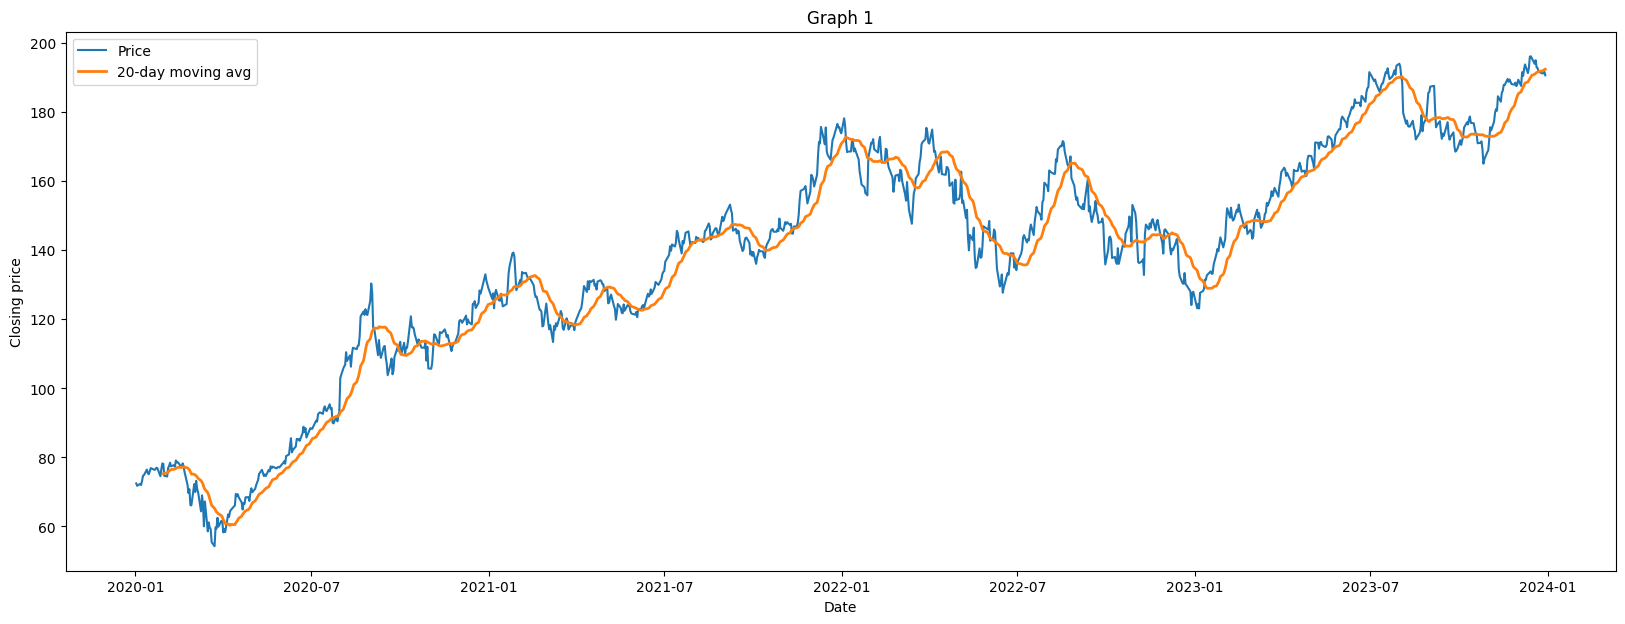

In [24]:
#Graph of price and 20-day moving avg

moving_avg = (med_data['Adj Close']['AAPL'].rolling(window=20).sum())/20

plt.figure(figsize=(20,7))
plt.plot(med_data["Adj Close"]['AAPL'],label='Price') #closing price 
plt.plot(moving_avg,lw=2,label = '20-day moving avg')

plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title("Graph 1")
plt.legend()

plt.show()

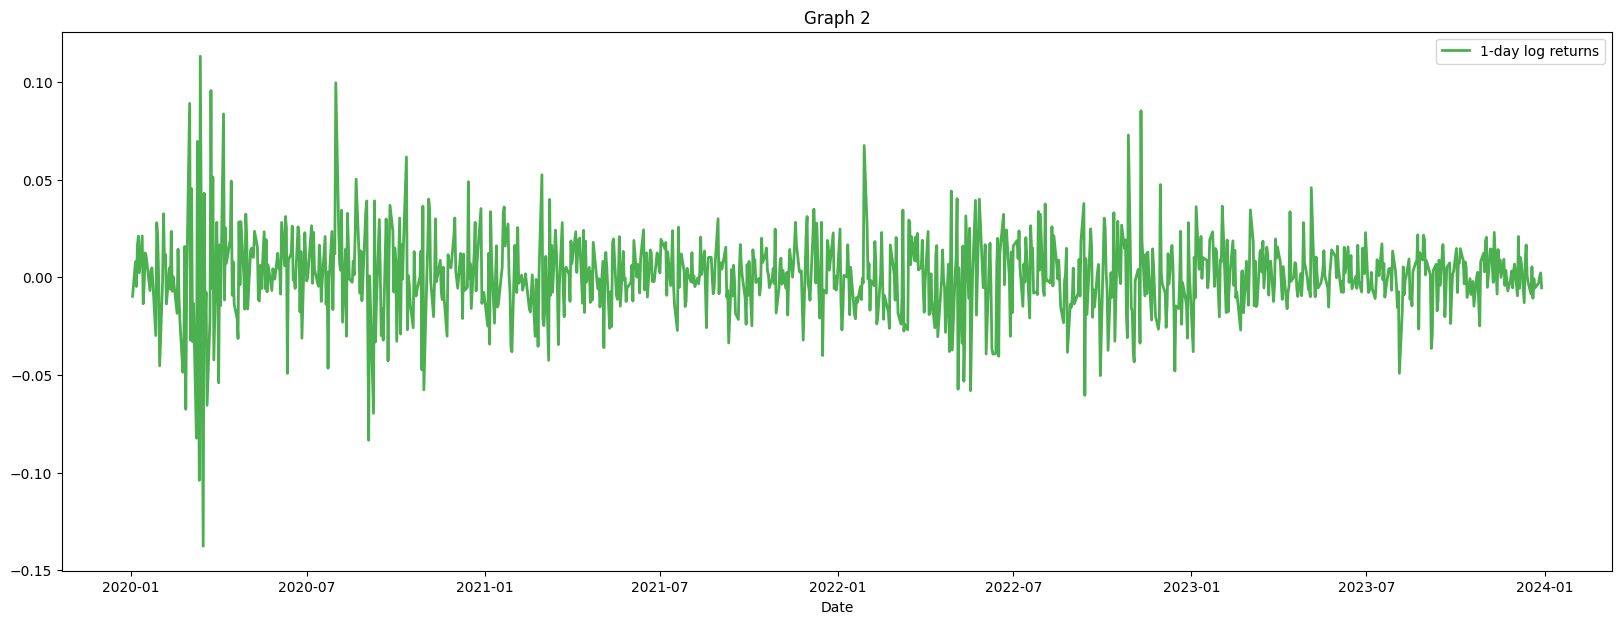

In [10]:
#Graph of 1-day log returns

plt.figure(figsize=(20,7))
plt.plot(returns['1_day_log'],lw=2,c='#4CAF50', label='1-day log returns')

plt.xlabel("Date")

plt.title("Graph 2")
plt.legend()

plt.show()

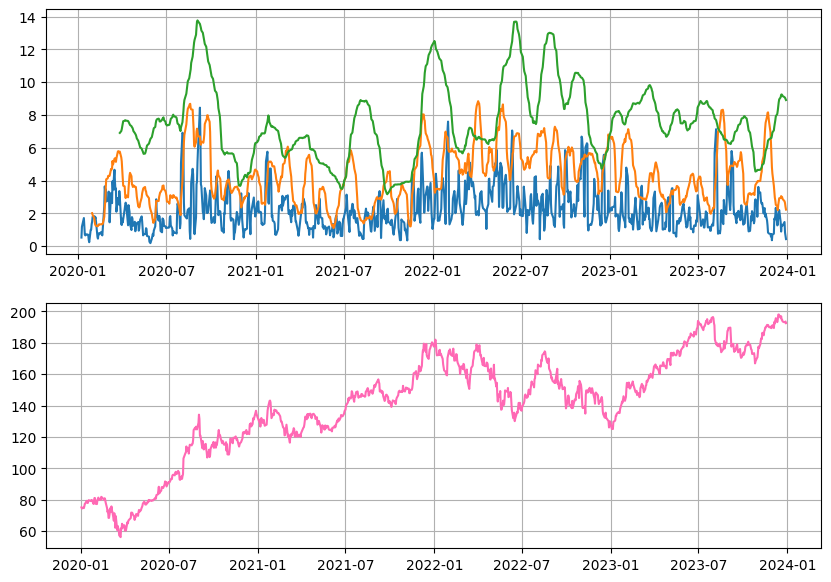

In [ ]:
#rolling volatilities graph

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(returns['5_rolling_volatility'],label='5-day rolling volatility')
plt.plot(returns['20_rolling_volatility'],label='20-day rolling volatility')
plt.plot(returns['60_rolling_volatility'],label='60-day rolling volatility')
plt.grid()

plt.subplot(2,1,2)
# plt.figure(figsize=(20,7))
plt.plot(med_data["Adj Close"]['AAPL'],label='Price',c='hotpink')
plt.grid()

# plt.xlabel("Date")
# plt.ylabel("Volatility")
# plt.title("Graph 3")
# plt.legend()

plt.show()

One trend which we can notice is that, high volatility and price drops are related. 

In [12]:
#i'll do the bonus part later

# TASK 3 STATIONARITY

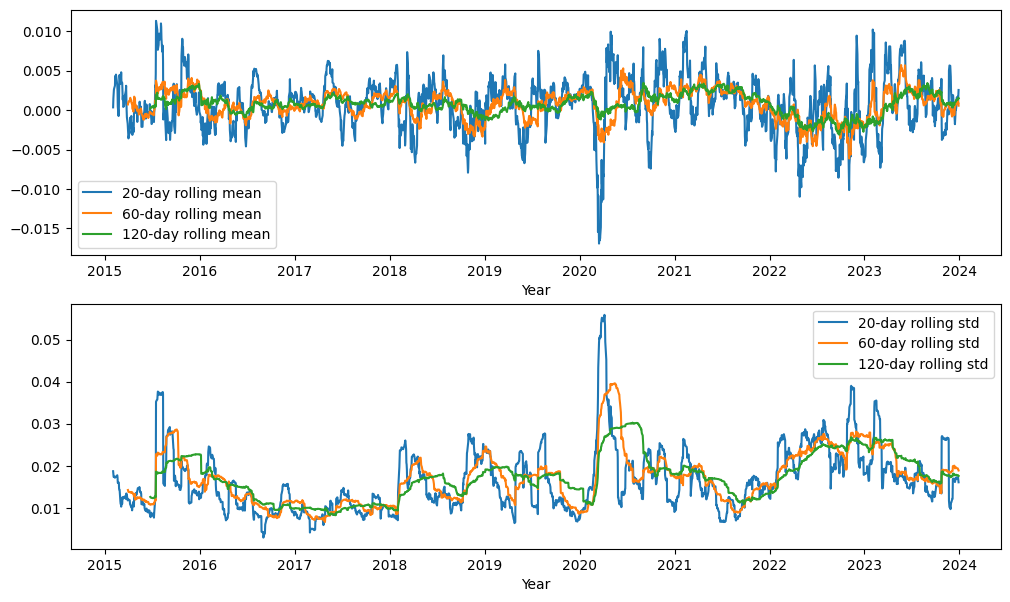

In [25]:
#TASK 3 STATIONARITY
#I'll take GOOGLE as my asset here over long term data.

google = long_data["Adj Close"]["GOOG"]

goog_returns = pd.DataFrame()
goog_returns['1day_log_returns'] = np.log(google/google.shift(1))

#Rolling mean of window sizes 20,60,120

goog_returns['rolling_mean_20'] = (goog_returns['1day_log_returns'].rolling(window=20).sum())/20
goog_returns['rolling_mean_60'] = (goog_returns['1day_log_returns'].rolling(window=60).sum())/60
goog_returns['rolling_mean_120'] = (goog_returns['1day_log_returns'].rolling(window=120).sum())/120

#rolling std of window 20,60,120
goog_returns['rolling_std_20'] = goog_returns['1day_log_returns'].rolling(window=20).std()
goog_returns['rolling_std_60'] = goog_returns['1day_log_returns'].rolling(window=60).std()
goog_returns['rolling_std_120'] = goog_returns['1day_log_returns'].rolling(window=120).std()

#plot of rolling mean and rolling std

plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.plot(goog_returns['rolling_mean_20'], label='20-day rolling mean')
plt.plot(goog_returns['rolling_mean_60'], label='60-day rolling mean')
plt.plot(goog_returns['rolling_mean_120'], label='120-day rolling mean')

plt.xlabel('Year')
plt.legend()



plt.subplot(2,1,2)
plt.plot(goog_returns['rolling_std_20'],label = '20-day rolling std')
plt.plot(goog_returns['rolling_std_60'],label = '60-day rolling std')
plt.plot(goog_returns['rolling_std_120'],label = '120-day rolling std')

plt.xlabel('Year')
plt.legend()



In [14]:
diff = goog_returns['rolling_mean_120'].max() - goog_returns['rolling_mean_120'].min()
diff



np.float64(0.006574867698426721)

In [15]:
diff = goog_returns['rolling_std_120'].max() - goog_returns['rolling_std_120'].min()
diff



np.float64(0.022010944475116236)

 we can see the difference between the max and min value of mean over 120 days, is almost negligible.

 Difference in std is also less but not negligible as in the case of rolling mean

# ADF TEST

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
#I'll be running the ADF test on google's log returns.

adf_result = adfuller(goog_returns['1day_log_returns'].dropna())

adf_stats = adf_result[0]
p_value = adf_result[1]

print(p_value < 0.05)

True


I get the output as True, hence we can reject the H0 hypothesis, and conclude that our returns are stationary(donot have a unit root).

# TASK 4

I'll use AMAZON for this task, lets see what unfolds.

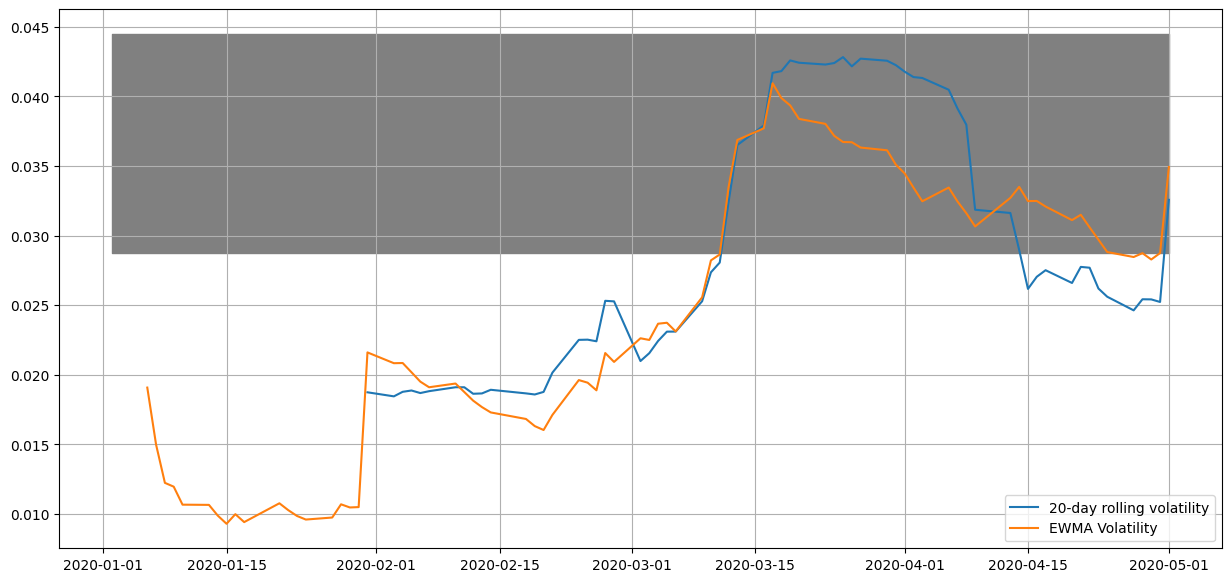

In [ ]:
#taking data from the covid crash, jan to april
covid_data = long_data.loc['2020-01-01':'2020-05-01']
stats_amzn_covid = pd.DataFrame()
stats_amzn_covid['log_returns'] = np.log(covid_data['Adj Close']['AMZN']/covid_data['Adj Close']['AMZN'].shift(1))
stats_amzn_covid['20-day_volatility'] = stats_amzn_covid['log_returns'].rolling(20).std()
stats_amzn_covid['EWMA_volatility'] = stats_amzn_covid['log_returns'].ewm(alpha=0.06,adjust=False).std()

#Plotting on graph
plt.figure(figsize=(15,7))
plt.plot(stats_amzn_covid['20-day_volatility'],label = '20-day rolling volatility')
plt.plot(stats_amzn_covid['EWMA_volatility'],label = 'EWMA Volatility')

plt.legend()
plt.grid()

#Regime detection - 60 %ile 
threshold_60 = stats_amzn_covid['EWMA_volatility'].quantile(0.6)
plt.fill_between(stats_amzn_covid.index,threshold_60,plt.gca().get_ylim()[1],color = 'grey')


1. Both the graphs have almost the same smoothness.
2. the EWMA crash reacted faster to the sudden crash, see carefully near 1st March, the orange line ascends, whereas the blue line descends. and it gains its peak way before the blue line's plateau. 
3. Thus we can conclude for risk management, EWMA volatility is better than 20-day volatility.

Variance of Graph 1 is 1.403520537752792.
Variance of Graph 2 is 1.2224541477959776.


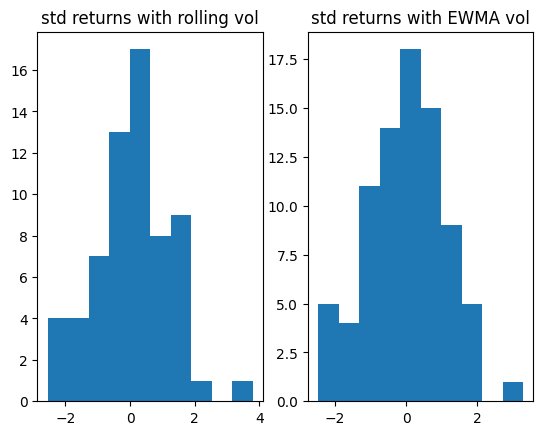

In [19]:
#Bonus part of the TASK 4

#I have defined two stnd returns based on EWMA volatility and rolling volatility.
stats_amzn_covid['std_returns_EWMA'] = stats_amzn_covid['log_returns']/stats_amzn_covid['EWMA_volatility']
stats_amzn_covid['std_returns_rolling'] = stats_amzn_covid['log_returns']/stats_amzn_covid['20-day_volatility']

var_EWM = (stats_amzn_covid['std_returns_EWMA'].std())**2
var_rolling = (stats_amzn_covid['std_returns_rolling'].std())**2

#plotting histogram
plt.subplot(1,2,1)
plt.hist(stats_amzn_covid['std_returns_rolling'])
plt.title('std returns with rolling vol')

plt.subplot(1,2,2)
plt.hist(stats_amzn_covid['std_returns_EWMA'])
plt.title('std returns with EWMA vol')

print(f'Variance of Graph 1 is {var_rolling}.')
print(f'Variance of Graph 2 is {var_EWM}.')


**Since we know the model with var nearer to 1 is a good model, hence EWMA model is better than the 20-day rolling model.**

# TASK 5

**For Task 5, we'll use the stock of TESLA and analyse it.**

In [20]:
TSLA_week = long_data['Adj Close']['TSLA'].resample('W').last()
TSLA_month = long_data['Adj Close']['TSLA'].resample('ME').last()

#log returns
return_daily = np.log(long_data['Adj Close']['TSLA']/long_data['Adj Close']['TSLA'].shift(1))
return_weekly = np.log(TSLA_week/TSLA_week.shift(1))
return_monthly = np.log(TSLA_month/TSLA_month.shift(1))

#finding skewness and kurtosis
data = {
    "Skew":[return_daily.skew(),return_weekly.skew(),return_monthly.skew()],
    "Kurt":[return_daily.kurt(),return_weekly.kurt(),return_monthly.kurt()]
}
test = pd.DataFrame(data, index = ['Daily','Weekly','Monthly'])
test.head()

,Skew,Kurt
Daily,-0.163346,4.517239
Weekly,0.078155,1.332059
Monthly,0.399737,0.690881


(array([0.01543853, 0.        , 0.1698238 , 0.32420908, 0.47859435,
        0.30877055, 0.20070086, 0.07719264, 0.06175411, 0.01543853]),
 array([-2.89953666, -2.29418136, -1.68882607, -1.08347077, -0.47811548,
         0.12723982,  0.73259512,  1.33795041,  1.94330571,  2.548661  ,
         3.1540163 ]),
 <BarContainer object of 10 artists>)

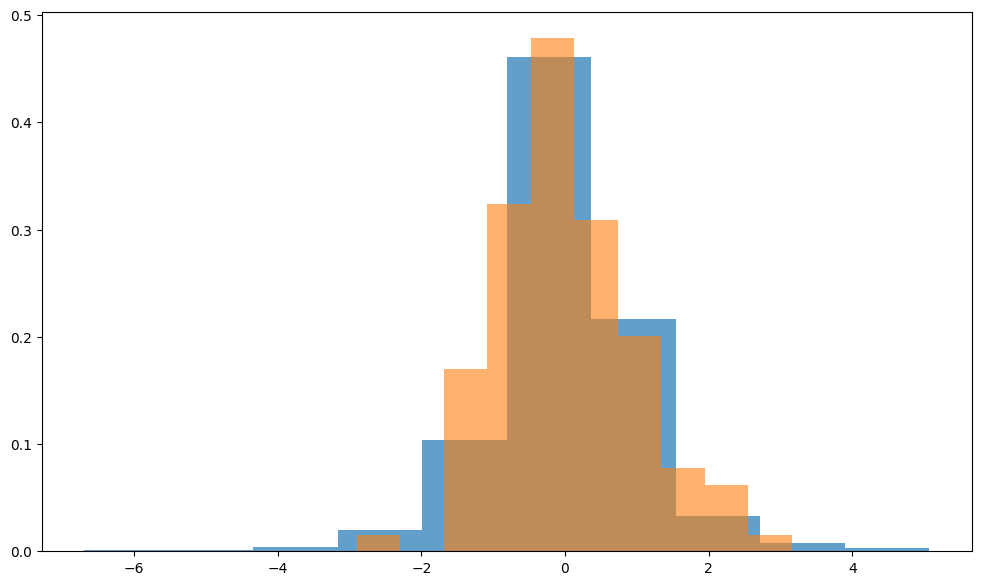

In [21]:
#To standardise daily returns
mean = return_daily.mean()
std = return_daily.std()
std_returns_daily = (return_daily-mean)/std

#To standardise monthly returns
mean = return_monthly.mean()
std = return_monthly.std()
std_returns_monthly = (return_monthly-mean)/std

#plotting histogram
plt.figure(figsize=(12,7))
plt.hist(std_returns_daily,density=True, alpha = 0.7)
plt.hist(std_returns_monthly, density=True,alpha = 0.6)

**Daily returns have fatter tails**

# TASK 6

Its easy, we would require adjusted close values today and at the day of my birth. 

$$\text{Total GPUs} = \frac{\left( \frac{\$1,000}{\text{Price}_{\text{birth}}} \right) \times \text{Price}_{\text{today}}}{\$1,600}$$

In [22]:
nvidia = yf.download('NVDA', start="2007-01-01", end="2026-01-01",auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [23]:
#My birthday is on 31st March.
price_birth = nvidia.loc['2007-03-30','Adj Close'] 
price_today = nvidia.loc['2025-12-26','Adj Close']
total_gpu =int(((1000/price_birth)*price_today)//1600)
print(f'{total_gpu} GPUs can be bought today.')

270 GPUs can be bought today.


/tmp/ipykernel_27248/2225771125.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_gpu =int(((1000/price_birth)*price_today)//1600)
